In [1]:
import pandas as pd
import numpy as np

# Генерация данных

In [2]:
#создание датафрейма
Data = pd.DataFrame(columns = ['len_text', 'friends', 'views'])
#фиксирование генератора
np.random.seed(42)
#генерация данных для каждой колонки
Data['len_text'] = list(np.random.randint(5, 100, 200))
Data['friends'] = list(np.random.randint(0, 1000, 200))
#Data['views'] = 5*np.array(Data['friends']) + np.random.randint(0, 100)
Data['views'] = [5*i + np.random.randint(0, 300) for i in np.array(Data['friends'])]
Data['sentiment'] = list(np.random.randint(0, 2, 200))
Data

,len_text,friends,views,sentiment
0,56,826,4164,1
1,97,373,2056,1
2,19,671,3403,0
3,76,607,3051,0
4,65,471,2526,0
...,...,...,...,...
195,41,452,2343,1
196,55,828,4356,1
197,48,815,4261,0
198,28,658,3308,0


# Визуализация

Визуализация наглядно показывает тренды, паттерны и выбросы, которые тяжело увидеть в числах

[Визуализация]( https://www.autodesk.com/research/publications/same-stats-different-graphs)

## Библиотеки

1.   ***Matplotlib*** - для визуализации данных двумерной и трехмерной графикой https://matplotlib.org/stable/
2.   ***Seaborn*** - для создания статистических графиков, основывается на matplotlib и абстрагирует его сложность https://seaborn.pydata.org/
3. ***Plotly*** - интерактивная визуализация данных https://plotly.com/python/



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Линейная диаграмма

**Линейная диаграмма** – это тип диаграммы, которая отображает информацию в виде ряда точек данных, называемых "маркерами", соединенных отрезками прямых линий. Лучше использовать, когда одна переменная сильно варьируется от другой.

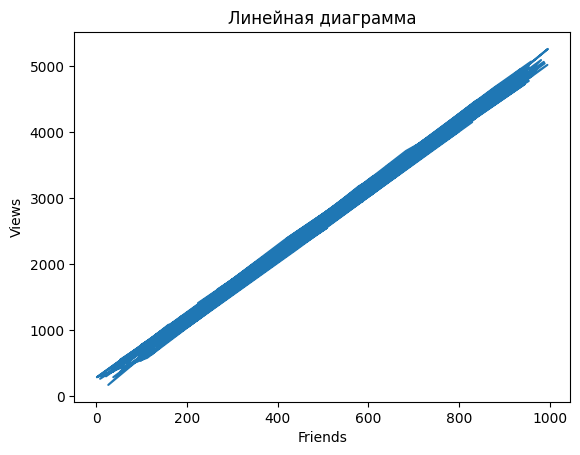

In [4]:
#matplotlib
x = Data['friends']
y = Data['views']
#Data['views']
#y = 5*np.array(Data['friends']) + np.random.randint(0, 100)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.xlabel("Friends")
plt.ylabel("Views")
plt.title('Линейная диаграмма');

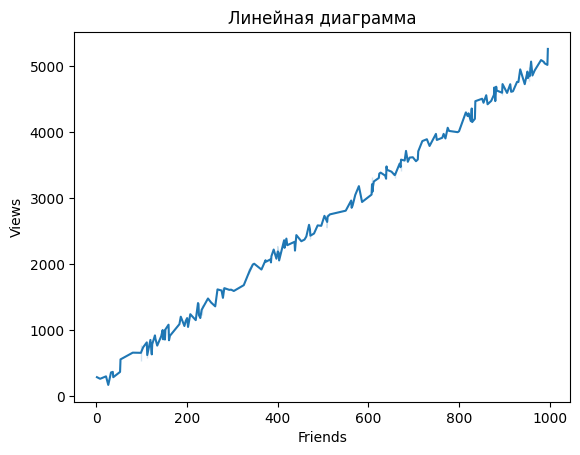

In [5]:
#seaborn
x = Data['friends']
y = Data['views']

sns.lineplot(x = x, y = y)

plt.xlabel("Friends")
plt.ylabel("Views")
plt.title('Линейная диаграмма');

In [6]:
#plotly
x = Data['friends']
y = Data['views']

fig = px.line(x=x, y=y, title='Линейная диаграмма').update_layout(
    xaxis_title="Friends", yaxis_title="Views")
fig.show()

## Диаграмма рассеивания

**Диаграмма рассеивания** - это графическое представление пар исследуемых данных в виде множества точек на координатной плоскости. Данная диаграмма дает возможность выдвинуть гипотезу о наличии или отсутствии корреляционной связи между двумя случайными величинами

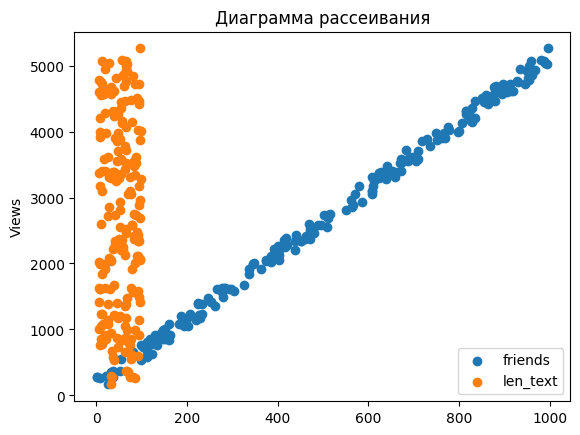

In [7]:
#matplotlib
x1 = Data['friends']
x2 = Data['len_text']
y = Data['views']

fig, ax = plt.subplots()
plt.scatter(x1, y, label = 'friends')
plt.scatter(x2, y, label = 'len_text')

plt.legend()
plt.ylabel("Views")
plt.title('Диаграмма рассеивания')
plt.show();

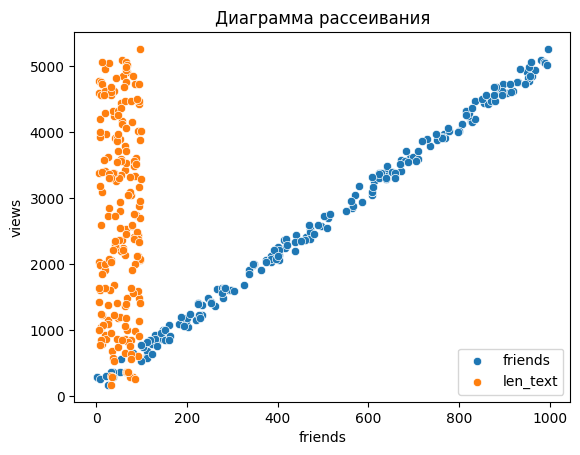

In [8]:
#seaborn
x1 = Data['friends']
x2 = Data['len_text']
y = Data['views']

fig, ax = plt.subplots()
sns.scatterplot(x = x1, y = y, label = 'friends')
sns.scatterplot(x = x2, y = y, label = 'len_text')

plt.title('Диаграмма рассеивания')
plt.show();

In [9]:
#plotly
x1 = Data['friends']
x2 = Data['len_text']
y = Data['views']

fig = px.scatter(x=[x1,x2], y=y, title='Диаграмма рассеивания')
fig.update_layout(showlegend=False)
fig.show()

## Гистограмма

**Гистограмма** - столбчатая диаграмма, один из видов графического изображения статистического распределения каких-либо величин по *количественному* признаку. Часто используется для визуализации *непрерывных* распределений.

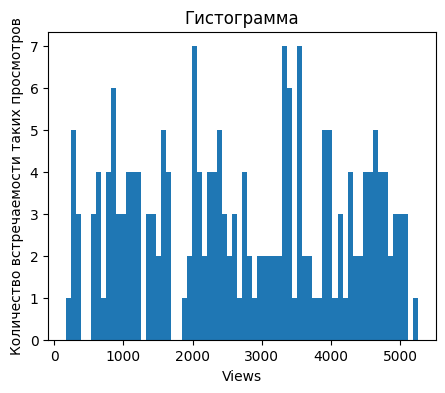

In [10]:
#matplotlib
x = Data['views']

fig, ax = plt.subplots(figsize = (5,4))
plt.hist(x, bins = 70)

plt.xlabel("Views")
plt.ylabel("Количество встречаемости таких просмотров")
plt.title('Гистограмма')
plt.show();

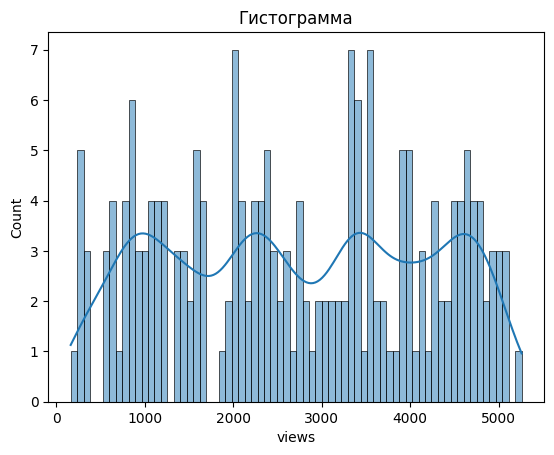

In [11]:
#seaborn
x = Data['views']

fig, ax = plt.subplots()
sns.histplot(x = x, bins = 70, kde = True, kde_kws = {'bw_adjust': 0.5})

plt.title('Гистограмма')
plt.show();

In [12]:
#plotly
x = Data['views']

fig = px.histogram(x=x, title='Гистограмма', nbins = 70)
fig.update_layout(xaxis_title="Views",
                  yaxis_title="Количество встречаемости таких просмотров")

fig.show()

## Столбчатая диаграмма

**Столбчатая диаграмма** - диаграмма, представленная прямоугольными зонами, высоты или длины которых пропорциональны величинам, которые они отображают. Столбчатые диаграммы лучше применять для визуализации категориальных переменных.

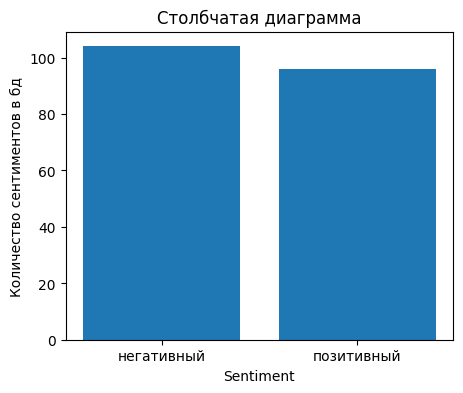

In [13]:
#matplotlib
x = list(Data['sentiment'])

fig, ax = plt.subplots(figsize = (5,4))
plt.bar(x = ['негативный', 'позитивный'], height = [x.count(np.unique(x)[0]), x.count(np.unique(x)[1])])

plt.xlabel("Sentiment")
plt.ylabel("Количество сентиментов в бд")
plt.title('Столбчатая диаграмма')
plt.show();

## Круговая диаграмма

**Круговая диаграмма** - это способ представления данных. Такая диаграмма построена в виде круга, где каждый сектор - это категория данных

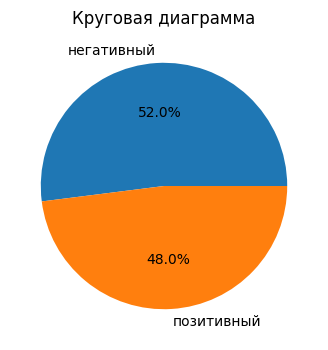

In [14]:
#matplotlib
x = list(Data['sentiment'])

fig, ax = plt.subplots(figsize = (5,4))
ax.pie(labels = ['негативный', 'позитивный'], x = [x.count(np.unique(x)[0]), x.count(np.unique(x)[1])], autopct = '%1.1f%%')

plt.title('Круговая диаграмма')
plt.show();

#Визуализация текстов

## Облако слов

Облако слов - метод визуализации данных, используемый для предоставления текстовых данных, в котором размер каждого слова указывает на его частоту

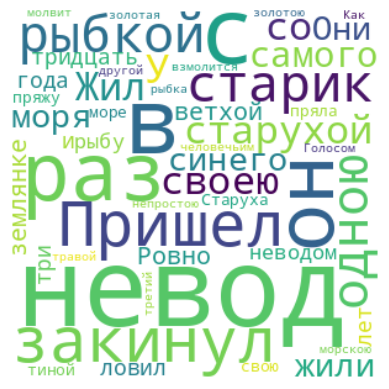

In [15]:
#matplotlib
from wordcloud import WordCloud
text = "Жил старик со своею старухой У самого синего моря; Они жили в ветхой землянке Ровно тридцать лет и три года. Старик ловил неводом рыбу Старуха пряла свою пряжу. Раз он в море закинул невод, — Пришел невод с одною тиной. Он в другой раз закинул невод, — Пришел невод с травой морскою. В третий раз закинул он невод, — Пришел невод с одною рыбкой, С непростою рыбкой, — золотою. Как взмолится золотая рыбка! Голосом молвит человечьим:"

wc = WordCloud(width=300, height=300, background_color="white")
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

##Визуализация биграмм

In [16]:
!pip install pymorphy3 > None
import nltk
from nltk.tokenize import word_tokenize
import pymorphy3
from string import punctuation
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
#функция предобработки текстов
morph = pymorphy3.MorphAnalyzer()
punktuations = list(punctuation)
punktuations.append('—')
def preproc (text):
  token = word_tokenize(text.lower())
  words_without_punkt = [i for i in token if (i not in punktuations)]
  lem = [morph.parse(i)[0].normal_form for i in words_without_punkt]
  return lem

In [18]:
text = "Жил старик со своею старухой У самого синего моря; Они жили в ветхой землянке Ровно тридцать лет и три года. Старик ловил неводом рыбу Старуха пряла свою пряжу. Раз он в море закинул невод, — Пришел невод с одною тиной. Он в другой раз закинул невод, — Пришел невод с травой морскою. В третий раз закинул он невод, — Пришел невод с одною рыбкой, С непростою рыбкой, — золотою. Как взмолится золотая рыбка! Голосом молвит человечьим:"
#создаем список биграмм
pd.Series(nltk.ngrams(preproc(text), 2))

0            (жить, старик)
1               (старик, с)
2                 (с, свой)
3           (свой, старуха)
4              (старуха, у)
              ...          
66    (взмолиться, золотой)
67         (золотой, рыбка)
68           (рыбка, голос)
69         (голос, молвить)
70     (молвить, человечий)
Length: 71, dtype: object

In [19]:
#считаем количество биграмм
pd.Series(nltk.ngrams(preproc(text), 2)).value_counts()

(невод, прийти)         3
(прийти, невод)         3
(невод, с)              3
(закинуть, невод)       2
(он, в)                 2
                       ..
(старуха, прясть)       1
(прясть, свой)          1
(свой, пряжа)           1
(пряжа, раз)            1
(молвить, человечий)    1
Name: count, Length: 61, dtype: int64

<ipython-input-20-5fefeee2387f>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'TOP 10 bigram')

<Figure size 2000x1000 with 0 Axes>

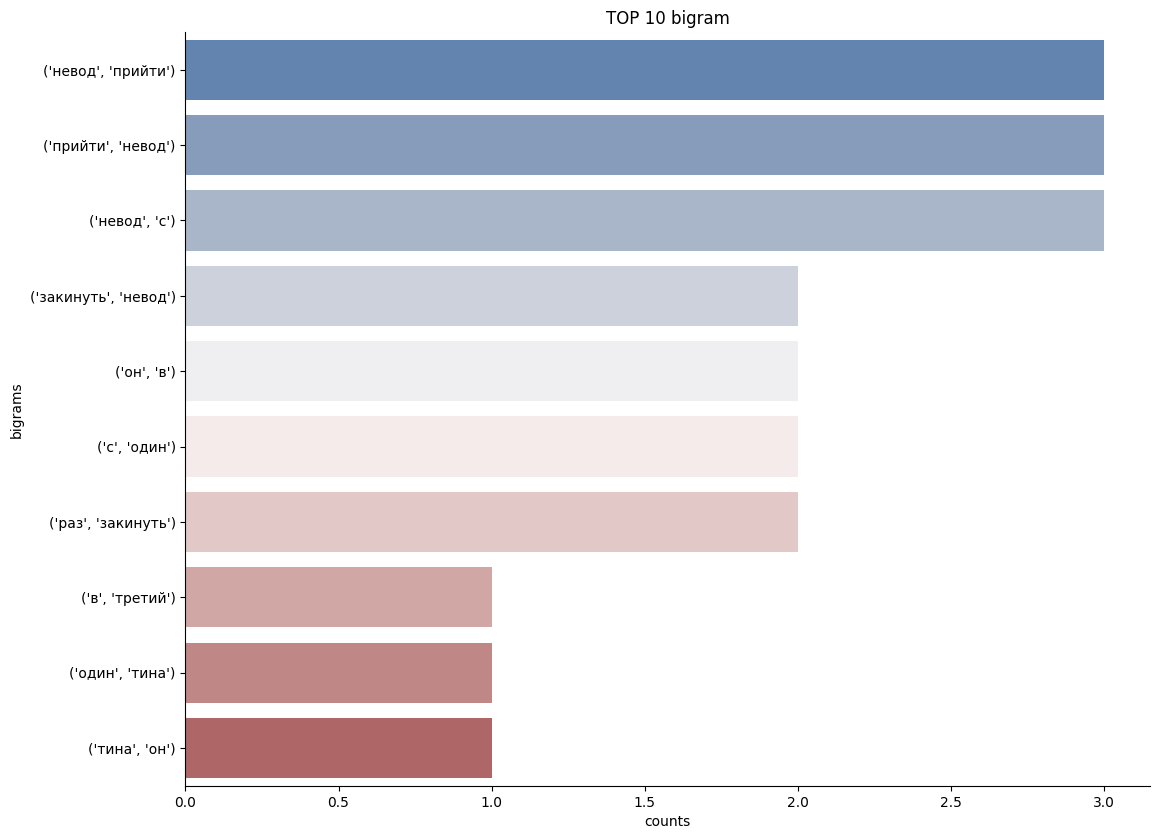

In [20]:
# Визуализация биграмм
bigrams_series = (pd.Series(nltk.ngrams(preproc(text), 2)).value_counts())[:10]
bigrams_top = pd.DataFrame(bigrams_series.sort_values(ascending=False))
bigrams_top = bigrams_top.reset_index().rename(columns={'index': 'bigrams', 'count':'counts'})
bigrams_top['bigrams'] = bigrams_top['bigrams'].astype(str)
plt.figure(figsize=(20,10))
sns.catplot(x = 'counts' , y='bigrams', kind="bar", palette="vlag", data=bigrams_top, height=8.27, aspect=11.7/8.27)
plt.title('TOP 10 bigram')

##Тематическое моделирование

In [21]:
!pip install pyLDAvis > None
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.lda_model

In [22]:
text_list = ['Жил старик со своею старухой',
             'У самого синего моря;',
             'Они жили в ветхой землянке',
             'Ровно тридцать лет и три года.',
             'Старик ловил неводом рыбу',
             'Старуха пряла свою пряжу.',
             'Раз он в море закинул невод,',
             '— Пришел невод с одною тиной.',
             'Он в другой раз закинул невод,',
             '— Пришел невод с травой морскою.',
             'В третий раз закинул он невод,',
             '— Пришел невод с одною рыбкой,',
             'С непростою рыбкой, — золотою.',
             'Как взмолится золотая рыбка!',
             'Голосом молвит человечьим:']

text_preproc_list = [' '.join(preproc(t)) for t in text_list]
#text_preproc_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [23]:
vectorizer = CountVectorizer()
lda_model = LatentDirichletAllocation(
n_components=3, # Выбираем количество тем
learning_method='online',
random_state=62,
n_jobs = -1
)

data_matrix = vectorizer.fit_transform(text_preproc_list)
lda_output = lda_model.fit_transform(data_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [24]:
# Вывод тем и связанных с ними слов
for topic_idx, topic_words in enumerate(lda_model.components_):
    top_words_idx = topic_words.argsort()[-10:][::-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    print(f"Тема {topic_idx + 1}: {', '.join(top_words)}")

Тема 1: жить, рыбка, они, непростой, золотой, землянка, ветхий, голос, раз, рыба
Тема 2: год, как, ровно, взмолиться, тридцать, рыбка, золотой, три, непростой, закинуть
Тема 3: невод, раз, он, закинуть, прийти, свой, старик, один, море, старуха


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [25]:
pyLDAvis.enable_notebook()
pyLDAvis.lda_model.prepare(lda_model, data_matrix, vectorizer, mds='tsne')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      293.584625   16.890566       1        1  65.465866
1      106.945564  103.570900       2        1  18.801815
0      124.964012 -100.777138       3        1  15.732319, topic_info=         Term      Freq     Total Category  logprob  loglift
2         год  1.000000  1.000000  Default  30.0000  30.0000
8     золотой  1.000000  1.000000  Default  29.0000  29.0000
25      рыбка  2.000000  2.000000  Default  28.0000  28.0000
15  непростой  1.000000  1.000000  Default  27.0000  27.0000
18        они  1.000000  1.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
6    закинуть  0.199120  2.563579   Topic3  -3.8753  -0.7058
19     прийти  0.194811  2.537435   Topic3  -3.8971  -0.7174
16       один  0.190241  1.960273   Topic3  -3.9209  -0.4831
12       море  0.189522  1.963553   Topic3  -3.9247  -0.4886
17         он  0.189209  2.551298   Topic3  -3.9263  -0.7521

[132 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         3  0.909763      ветхий
1         2  0.880885  взмолиться
2         2  0.677942         год
3         1  0.723548       голос
4         1  0.736248      другой
5         1  0.580954        жить
5         3  0.580954        жить
6         1  0.780159    закинуть
7         3  0.907924    землянка
8         2  0.683017     золотой
8         3  0.683017     золотой
9         2  0.860816         как
10        1  0.732465      ловить
11        1  0.745192     молвить
12        1  1.018562        море
13        1  0.748541     морской
14        1  1.004549       невод
15        3  0.891219   непростой
16        1  1.020266        один
17        1  0.783915          он
18        3  0.880946         они
19        1  0.788198      прийти
20        1  0.742668       пряжа
21        1  0.729295      прясть
22        1  0.768253         раз
23        2  0.877469       ровно
24        1  0.738411        рыба
25        1  0.491934       рыбка
25        2  0.491934       рыбка
25        3  0.491934       рыбка
26        1  0.727372         сам
27        1  1.016659        свой
28        1  0.726277       синий
29        1  1.005761      старик
30        1  1.022572     старуха
31        1  0.710957        тина
32        1  0.735504       трава
33        1  0.736955      третий
34        2  0.909299         три
35        2  0.883179    тридцать
36        1  0.723708   человечий, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

# Лабораторная работа 3

Построить 3 любых графика, анализирующих выбранный корпус данных